#Prevendo preços de apartamento

##Guia de um projeto

1. Um olhar Geral sobre o problema;
2. obtenha os dados;
3. Exploração dos dados;
4. Preparar os dados para os algoritmos;
5. Selecione um modelo e treine-o;
6. Otimize seu modelo;
7. Apresente sua solução;
8. Coloque seu modelo em produção e mantenha seu sistema.


## Exploração dos dados

In [1]:
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
df = pd.read_csv('/content/drive/MyDrive/Colab/Formação Data Science e Machine Learning/Conceitos básicos ML/apostila/sao-paulo-properties-april-2019.csv')

In [3]:
df.head()

,Price,Condo,Size,Rooms,Toilets,Suites,Parking,Elevator,Furnished,Swimming Pool,New,District,Negotiation Type,Property Type,Latitude,Longitude
0,930,220,47,2,2,1,1,0,0,0,0,Artur Alvim/São Paulo,rent,apartment,-23.543138,-46.479486
1,1000,148,45,2,2,1,1,0,0,0,0,Artur Alvim/São Paulo,rent,apartment,-23.550239,-46.480718
2,1000,100,48,2,2,1,1,0,0,0,0,Artur Alvim/São Paulo,rent,apartment,-23.542818,-46.485665
3,1000,200,48,2,2,1,1,0,0,0,0,Artur Alvim/São Paulo,rent,apartment,-23.547171,-46.483014
4,1300,410,55,2,2,1,1,1,0,0,0,Artur Alvim/São Paulo,rent,apartment,-23.525025,-46.482436


In [7]:
df_rent = df[df['Negotiation Type'] == 'rent']

In [ ]:
df_rent.shape


In [ ]:
df_rent.info()

In [ ]:
df_rent.describe()

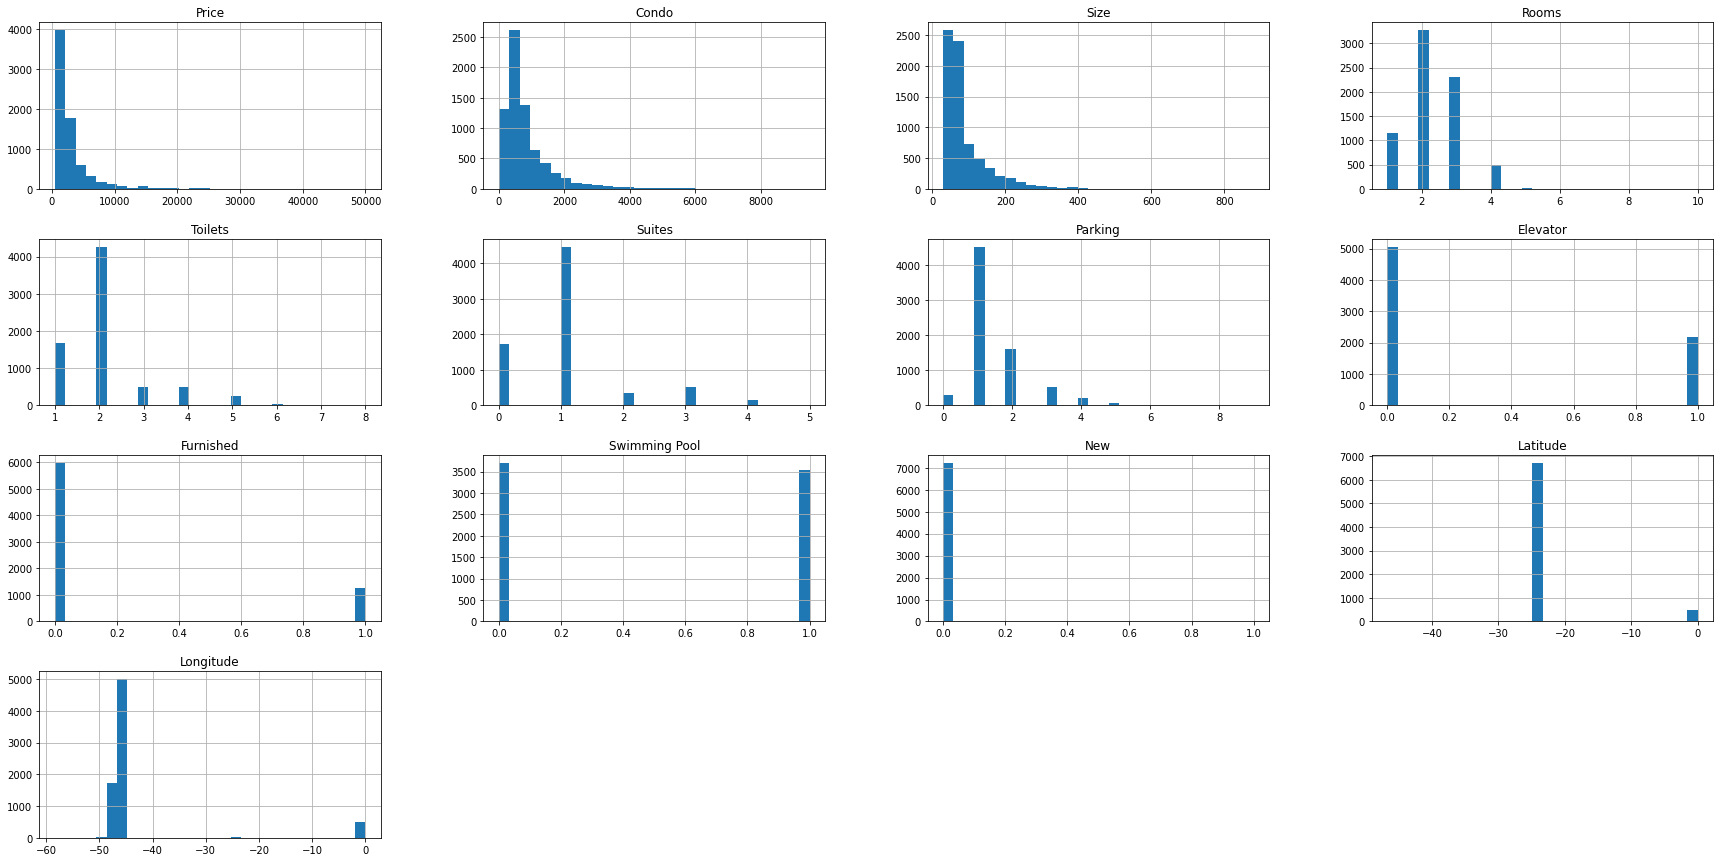

In [ ]:
df_rent.hist(bins=30, figsize=(30,15));

In [ ]:
df_rent['Property Type'].value_counts()

apartment    7228
Name: Property Type, dtype: int64

In [ ]:
df_rent['District'].value_counts()

Mooca/São Paulo              178
Moema/São Paulo              163
Vila Mariana/São Paulo       161
Morumbi/São Paulo            159
Pinheiros/São Paulo          153
                            ... 
Lajeado/São Paulo              8
Guaianazes/São Paulo           6
Parque do Carmo/São Paulo      6
Jardim São Luis/São Paulo      3
Grajaú/São Paulo               2
Name: District, Length: 94, dtype: int64

In [ ]:
df_rent.corr()["Price"].sort_values(ascending=False)

Price            1.000000
Size             0.731795
Condo            0.700361
Parking          0.640743
Suites           0.588329
Toilets          0.583488
Rooms            0.390951
Swimming Pool    0.206884
Furnished        0.171859
Elevator         0.031860
New             -0.008477
Latitude        -0.036935
Longitude       -0.038362
Name: Price, dtype: float64

## Preparação dos dados e seleção do modelo

In [11]:
import sklearn

In [8]:
df_rent.shape

(7228, 16)

In [9]:
df_cleaned = df_rent.drop(['New', "Property Type", "Negotiation Type"], axis =1)

In [ ]:
df_cleaned

## Tratamento de dados categóticos

In [12]:
from sklearn.preprocessing import OrdinalEncoder # utilizar quando tiver poucas classes de atributo, nesse dataset temos mais de 90 bairros no distrito
ordinal_encoder = OrdinalEncoder()

district_encoded = ordinal_encoder.fit_transform(df_rent[['District']])

In [ ]:
district_encoded

In [14]:
from sklearn.preprocessing import OneHotEncoder

cat_encoder = OneHotEncoder()

housing_cat_1hot = cat_encoder.fit_transform(df_cleaned[['District']])
housing_cat_1hot

<7228x94 sparse matrix of type '<class 'numpy.float64'>'
	with 7228 stored elements in Compressed Sparse Row format>

In [ ]:
One_hot = pd.get_dummies(df_cleaned['District'])

df = df_cleaned.drop('District', axis = 1)
df = df.join(One_hot)
df

## Treinamento do modelo

In [ ]:
df

In [16]:
from sklearn.model_selection import train_test_split

In [17]:
y = df["Price"]
X = df.loc[:,df.columns != "Price"]

In [18]:
x_train,x_test,y_train,y_test = train_test_split(X,y, test_size=0.3)

In [19]:
#Linear Regression
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()

lin_reg.fit(x_train, y_train) 

LinearRegression()

In [20]:
alguns_dados = x_train.iloc[:5]
algumas_label = y_train.iloc[:5]


print("Predições: ", lin_reg.predict(alguns_dados))
print('Labels: ', algumas_label.values)

Predições:  [3294.5213623  1927.68725586  975.58947754 3378.49621582 1024.47729492]
Labels:  [1800 1200 1120 3900 1500]


In [21]:
from sklearn.metrics import mean_squared_error

preds = lin_reg.predict(x_train)
lin_mse = mean_squared_error(y_train,preds)

lin_rmse = np.sqrt(lin_mse)
lin_rmse

1860.0568132260632

In [22]:
#DecisionTreee Regressor

from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor()
tree_reg.fit(x_train, y_train)

DecisionTreeRegressor()

In [23]:
preds = tree_reg.predict(x_train)
tree_mse = mean_squared_error(y_train,preds)

tree_rmse = np.sqrt(tree_mse)
tree_rmse

34.30895343916505

##Cross-Validation

In [26]:
from sklearn.model_selection import cross_val_score

score = cross_val_score(tree_reg, x_train, y_train,scoring='neg_mean_squared_error',cv = 10)
tree_rmse_scores = np.sqrt(-score)

def display_scores(scores):
  print('Scores: ', scores)
  print('Mean: ', scores.mean())
  print('Standard deviation: : ', scores.std())

display_scores(tree_rmse_scores)

Scores:  [2631.78447338 1844.84869093 2126.34622923 1958.17321966 1987.25929564
 2236.92848388 1755.41318884 2000.82713029 2417.72618122 2546.46285092]
Mean:  2150.576974399514
Standard deviation: :  283.45013331791336
